In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df=pd.read_csv('C:/Users/tjoeun/Desktop/관측소/관측소별 결합 데이터/관측소2018~2022.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571600 entries, 0 to 2571599
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지점명     object 
 1   일시      object 
 2   PM10    float64
 3   PM2.5   float64
 4   Ozon    float64
 5   NO2     float64
 6   CO      float64
 7   SO2     float64
dtypes: float64(6), object(2)
memory usage: 157.0+ MB


In [6]:
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\missingno\missingno.py:264: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\missingno\missingno.py:271: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<AxesSubplot:>

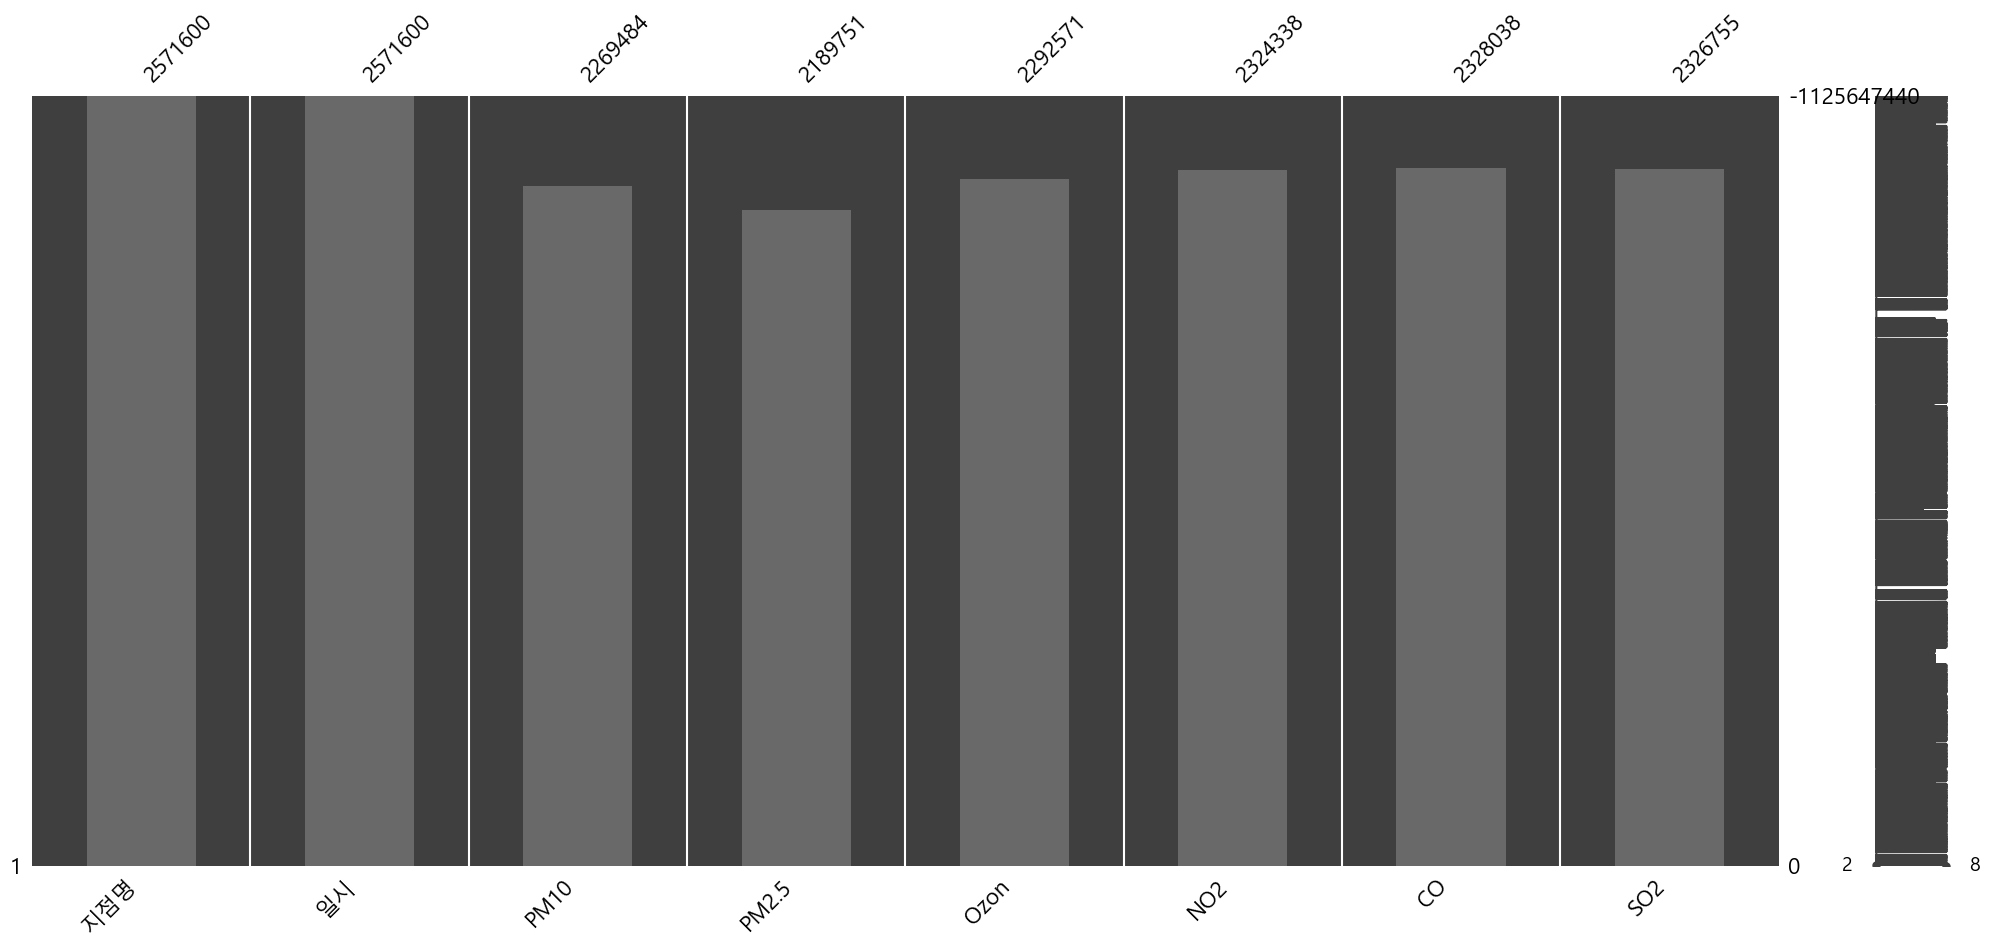

In [7]:
%matplotlib inline
import missingno as msno
msno.matrix(df)
#흰색 - 결측값
#스파크라인(spark line) - 각 샘플의 데이터 완성도를 표현
msno.bar(df) #필드별로 결측값이 얼마나 있는지 확인

In [8]:
df1=df[['PM10','PM2.5']]

In [9]:
df1=df.dropna()

In [10]:
df[df['PM2.5'].isnull()]

,지점명,일시,PM10,PM2.5,Ozon,NO2,CO,SO2
56,강화,2017-12-03 10:00,49.0,NaN,0.007,0.016,0.5,0.005
61,강화,2017-12-03 15:00,88.0,NaN,0.017,0.019,0.5,0.006
62,강화,2017-12-03 16:00,78.0,NaN,0.017,0.020,0.5,0.006
152,강화,2017-12-07 10:00,45.0,NaN,0.009,0.015,0.5,0.005
154,강화,2017-12-07 12:00,57.0,NaN,0.017,0.012,0.4,0.005
...,...,...,...,...,...,...,...,...
2571099,홍천,2022-12-21 15:00,NaN,NaN,NaN,NaN,NaN,NaN
2571100,홍천,2022-12-21 16:00,NaN,NaN,NaN,NaN,NaN,NaN
2571101,홍천,2022-12-21 16:00,NaN,NaN,NaN,NaN,NaN,NaN
2571270,홍천,2022-12-25 05:00,43.0,NaN,0.002,0.019,0.7,0.001


In [11]:
x=df1['PM10']
y=df1['PM2.5']
stats.linregress(x, y)
# PM2.5=5.5989+0.37674*PM10

LinregressResult(slope=0.3767431213741741, intercept=5.598979963545638, rvalue=0.7400994133102164, pvalue=0.0, stderr=0.00024021703412692878, intercept_stderr=0.010923382080084457)

In [12]:
x=df1['PM2.5']
y=df1['PM10']
stats.linregress(x, y)
# PM10=7.50653+1.4538987*PM2.5

LinregressResult(slope=1.4539008425269018, intercept=7.506494218191559, rvalue=0.7400994133102164, pvalue=0.0, stderr=0.0009270288652717964, intercept_stderr=0.022187756533574535)

In [13]:
# 미세, 초미세 농도 결측값 회귀추정하여 대체
df['PM10']=df['PM10'].fillna(7.50653+1.4538987*df['PM2.5'])
df['PM2.5']=df['PM2.5'].fillna(5.5989+0.37674*df['PM10'])

In [14]:
df.to_csv('관측소2018~2022_수정.csv', index=False)